In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Read csv data file, change to your location
df = pd.read_csv("iris.csv")

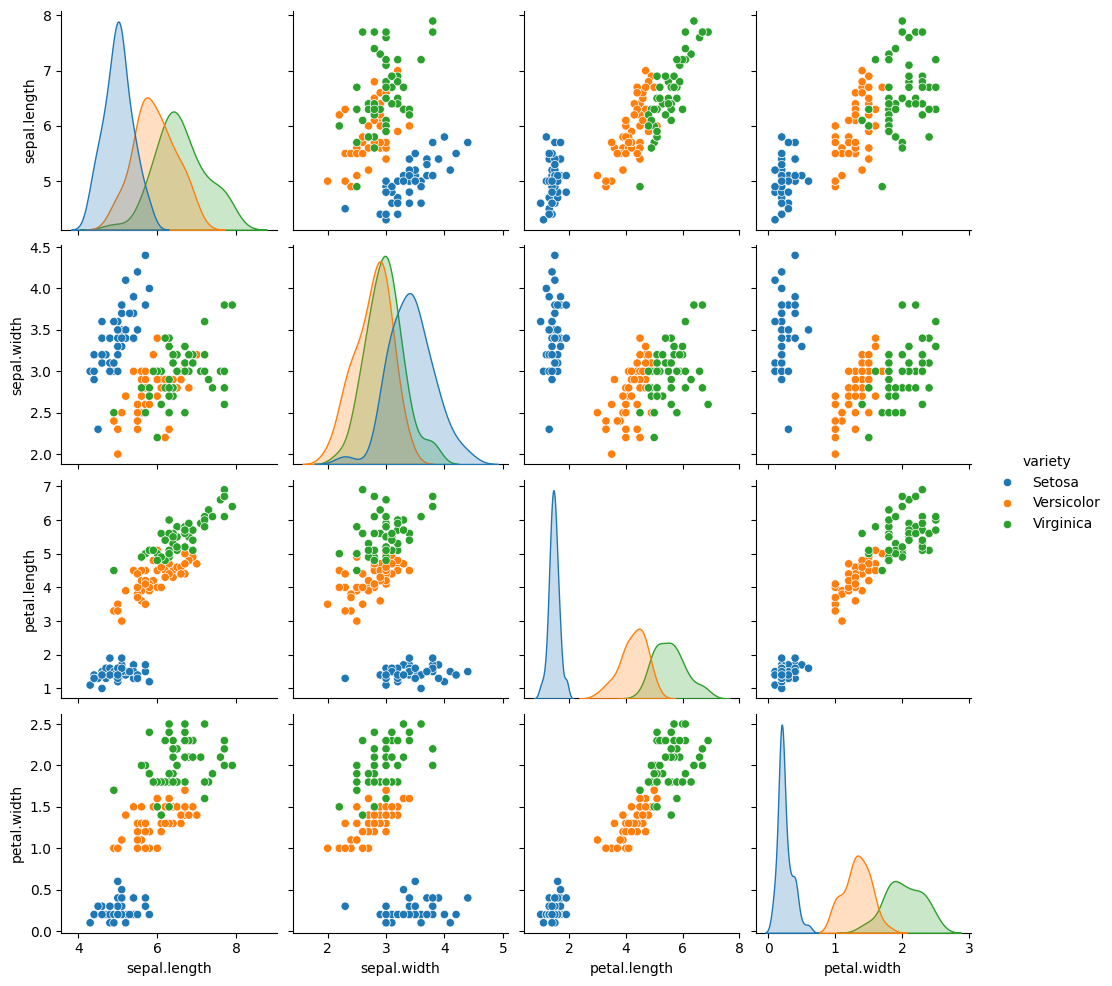

In [3]:
# show data information
df
df.describe()
sns.pairplot(df, hue = 'variety')

Text(0.5, 1.0, 'Correlation matrix')

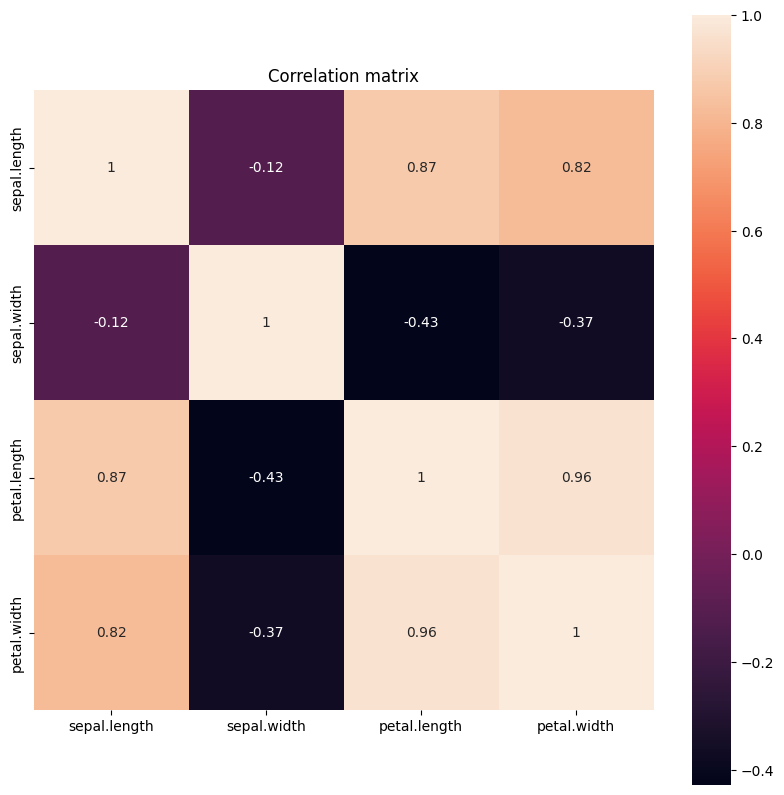

In [7]:
# We're seperating the species column
species = df["variety"].tolist()
X = df.drop("variety", axis=1)

# Standardize the data
X = (X - X.mean()) / X.std(ddof=0)

# Calculating the correlation matrix of the data
X_corr = (1 / 150) * X.T.dot(X)

# Plotting the correlation matrix
plt.figure(figsize=(10,10))
sns.heatmap(X_corr, vmax=1, square=True,annot=True)
plt.title('Correlation matrix')

In [8]:
# method1
u,s,v = np.linalg.svd(X_corr)
eig_values, eig_vectors = s, u
eig_values, eig_vectors
# method2
np.linalg.eig(X_corr)

EigResult(eigenvalues=array([2.91849782, 0.91403047, 0.14675688, 0.02071484]), eigenvectors=array([[ 0.52106591, -0.37741762, -0.71956635,  0.26128628],
       [-0.26934744, -0.92329566,  0.24438178, -0.12350962],
       [ 0.5804131 , -0.02449161,  0.14212637, -0.80144925],
       [ 0.56485654, -0.06694199,  0.63427274,  0.52359713]]))

Text(0.5, 0, 'Dimensions')

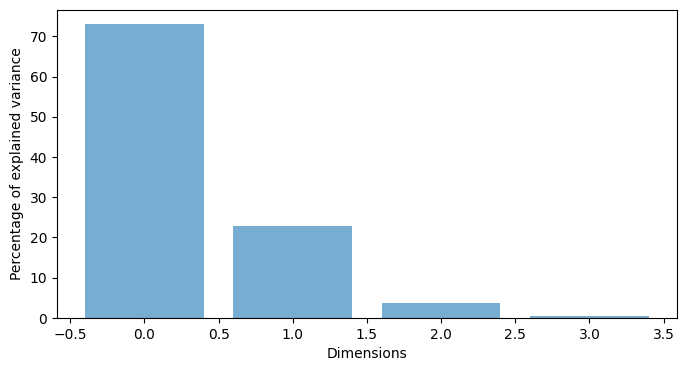

In [9]:
# plotting the variance explained by each PC
explained_variance=(eig_values / np.sum(eig_values))*100
plt.figure(figsize=(8,4))
plt.bar(range(4), explained_variance, alpha=0.6)
plt.ylabel('Percentage of explained variance')
plt.xlabel('Dimensions')

In [10]:
# calculating our new axis
pc1 = X.dot(eig_vectors[:,0])
pc2 = X.dot(eig_vectors[:,1])

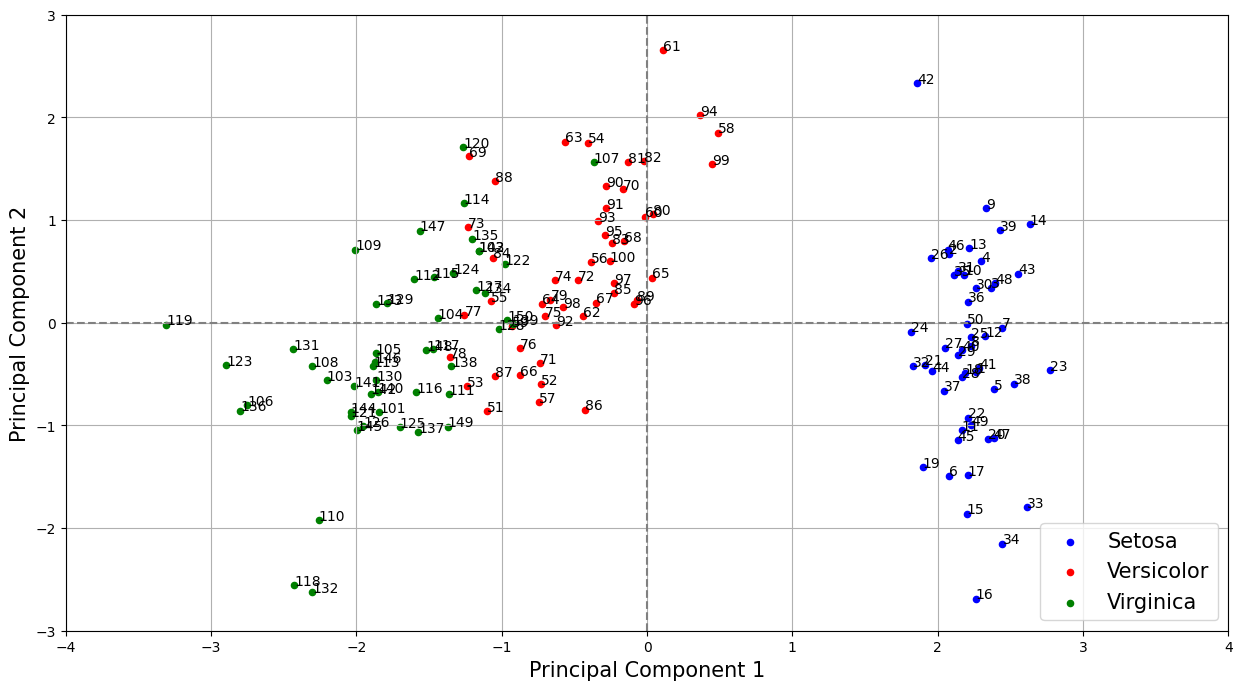

In [11]:
# plotting in 2D
def plot_scatter(pc1, pc2):
    fig, ax = plt.subplots(figsize=(15, 8))
    species_unique = list(set(species))
    species_colors = ["r","b","g"]

    for i, spec in enumerate(species):
        plt.scatter(pc1[i], pc2[i], label = spec, s = 20,
        c=species_colors[species_unique.index(spec)])
        ax.annotate(str(i+1), (pc1[i],pc2[i]))
        
    from collections import OrderedDict
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = OrderedDict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys(), prop={'size': 15}, loc=4)

    ax.set_xlabel('Principal Component 1', fontsize = 15)
    ax.set_ylabel('Principal Component 2', fontsize = 15)
    ax.axhline(y=0, color="grey", linestyle="--")
    ax.axvline(x=0, color="grey", linestyle="--")

    plt.grid()
    plt.axis([-4, 4, -3, 3])
    plt.show()
plot_scatter(pc1, pc2)

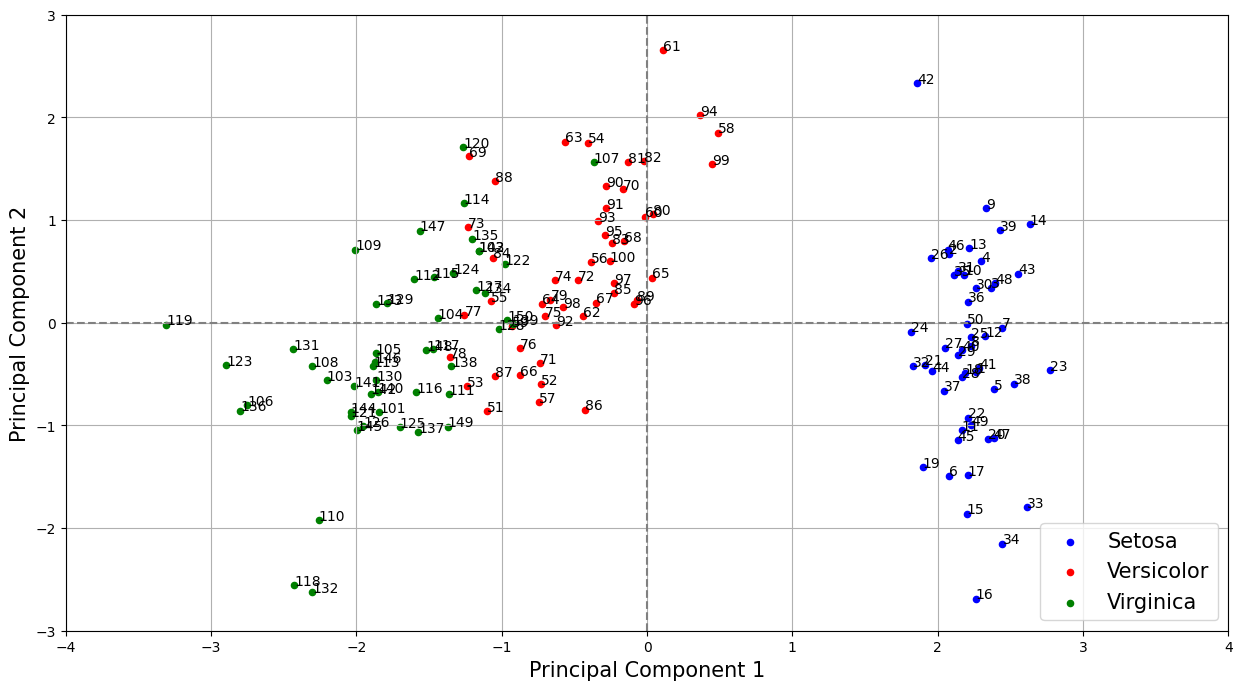

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Read csv data file, change to your location
df = pd.read_csv("iris.csv")
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
X = df.drop("variety", axis=1)
X = StandardScaler().fit_transform(X)
pca = PCA()
result = pca.fit_transform(X)

# Remember what we said about the sign of eigen vectors that might change ?
pc1 = - result[:,0]
pc2 = - result[:,1]
plot_scatter(pc1, pc2)

1) Sử dụng đoạn code chọn số chiều chính trong ví dụ 2, đưa tập dữ liệu đã đọc về còn 2 chiều, sau đó hiển thị lên màn hình để xem quan hệ giữa các lớp dữ liệu.

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns

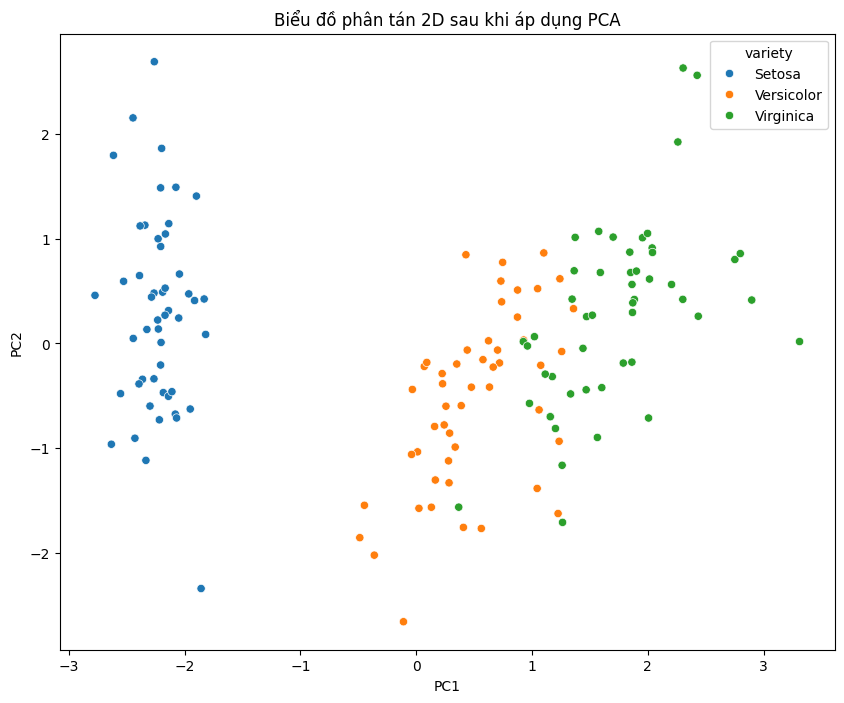

In [15]:
df = pd.read_csv("iris.csv")

# Chuẩn hoá dữ liệu
X = df.drop("variety", axis=1)
X = StandardScaler().fit_transform(X)

# Áp dụng PCA và giữ lại hai thành phần chính
pca = PCA(n_components=2)
result = pca.fit_transform(X)

# Tạo DataFrame mới từ kết quả PCA và gán nhãn lớp dữ liệu
df_pca = pd.DataFrame(data=result, columns=["PC1", "PC2"])
df_pca["variety"] = df["variety"]   

plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_pca, x="PC1", y="PC2", hue="variety")
plt.title("Biểu đồ phân tán 2D sau khi áp dụng PCA")
plt.show()

2) Với đoạn chương trình đọc dữ liệu đã có, hãy chạy lại ví dụ này với các thư viện của gói linear_model, lớp LogisticRegression và so sánh kết quả, chia Train:Test = 4:1 (theo từng loại hoa để tránh phân bố các loại hoa trong tập train và tập test mất cân bằng), tương ứng với 02 trường hợp:

a. Chạy với dữ liệu nguyên bản, lưu lại độ chính xác, ma trận nhầm lẫn trong trường hợp này;

In [19]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [21]:
df = pd.read_csv("iris.csv")

X = df.drop("variety", axis=1)
X = StandardScaler().fit_transform(X)
y = df["variety"]

In [22]:
# Chia tập dữ liệu thành tập train và tập test theo tỷ lệ 4:1 cho mỗi loại hoa
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Khởi tạo mô hình LogisticRegression và huấn luyện trên tập train
model = LogisticRegression()
model.fit(X_train, y_train)

# Dự đoán nhãn cho tập test
y_pred = model.predict(X_test)

In [23]:
# Đánh giá độ chính xác và ma trận nhầm lẫn
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

print("Độ chính xác:", accuracy)
print("Ma trận nhầm lẫn:")
print(confusion)

Độ chính xác: 0.9333333333333333
Ma trận nhầm lẫn:
[[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]


b. Chạy với dữ liệu giảm chiều, hãy xử lý theo 02 quy trình dưới đây:

i. Chia dữ liệu thành Train – Test, sau đó thực hiện giảm chiều một cách phù hợp và thực hiện bài toán phân loại. Lưu lại các kết quả.

In [24]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [25]:
df = pd.read_csv("iris.csv")

X = df.drop("variety", axis=1)
X = StandardScaler().fit_transform(X)
y = df["variety"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [26]:
# Giảm chiều dữ liệu sử dụng phân tích thành phần chính (Principal Component Analysis - PCA)
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [27]:
# Khởi tạo mô hình LogisticRegression và huấn luyện trên tập train đã giảm chiều
model = LogisticRegression()
model.fit(X_train_pca, y_train)

# Dự đoán nhãn cho tập test đã giảm chiều
y_pred = model.predict(X_test_pca)

In [28]:
# Dự đoán nhãn cho tập test đã giảm chiều
y_pred = model.predict(X_test_pca)

# Đánh giá độ chính xác và ma trận nhầm lẫn
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

print("Độ chính xác:", accuracy)
print("Ma trận nhầm lẫn:")
print(confusion)

Độ chính xác: 0.9
Ma trận nhầm lẫn:
[[10  0  0]
 [ 0  9  1]
 [ 0  2  8]]


ii. Thực hiện giảm chiều trên toàn bộ dữ liệu, sau đó chia thành dữ liệu train:test và thực hiện bài toán phân loại.

In [29]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [30]:
df = pd.read_csv("iris.csv")

X = df.drop("variety", axis=1)
X = StandardScaler().fit_transform(X)
y = df["variety"]

In [31]:
# Giảm chiều dữ liệu sử dụng phân tích thành phần chính (Principal Component Analysis - PCA) trên toàn bộ dữ liệu
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

In [32]:
# Chia tập dữ liệu giảm chiều thành tập train và tập test theo tỷ lệ 4:1 cĐánh giá độ chính xác và ma trận nhầm lẫn:ho mỗi loại hoa
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, stratify=y, random_state=42)

In [33]:
# Khởi tạo mô hình LogisticRegression và huấn luyện trên tập train đã giảm chiều
model = LogisticRegression()
model.fit(X_train, y_train)

# Dự đoán nhãn cho tập test đã giảm chiều
y_pred = model.predict(X_test)

# Đánh giá độ chính xác và ma trận nhầm lẫn
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

print("Độ chính xác:", accuracy)
print("Ma trận nhầm lẫn:")
print(confusion)

Độ chính xác: 0.9
Ma trận nhầm lẫn:
[[10  0  0]
 [ 0  9  1]
 [ 0  2  8]]


Hãy so sánh kết quả trong 2 trường hợp i) và ii) để tìm ra quy trình phù hợp khi xử lý giảm chiều dữ liệu để phục vụ bài toán phân loại (tương tự với hồi quy). Hãy giải thích. Sau đó so sánh kết quả trong trường hợp dữ liệu nguyên bản và dữ liệu giảm chiều.

Giữa trường hợp a) và b), khi chạy với dữ liệu nguyên bản sẽ cho ra kết quả tốt hơn (0.93333 > 0.9), bởi quy trình giảm chiều dữ liệu có thể làm mất mát một phần thông tin và gây ảnh hưởng đến khả năng phân loại.

Giữa trường hợp a) và b), khi chạy với dữ liệu nguyên bản sẽ cho ra kết quả tốt hơn (0.93333 > 0.9), bởi quy trình giảm chiều dữ liệu có thể làm mất mát một phần thông tin và gây ảnh hưởng đến khả năng phân loại.


Giữa hai trường hợp b) là i) và ii) là tương tự nhau với độ chính xác là 0.9 và ma trận nhầm lẫn giống nhau. 
-> Không có sự khác biệt đáng kể giữa việc giảm chiều dữ liệu trước hay sau khi chia dữ liệu thành tập train và tập test. Cả hai quy trình đều cho kết quả tương tự trong việc phân loại dữ liệu.

Tuy nhiên kết quả có thể thay đổi tùy thuộc vào dữ liệu và bài toán phân loại khác, vì trong nhiều trường hợp, giảm chiều dữ liệu trước khi chia thành tập train và tập test có thể mang lại kết quả tốt hơn, đặc biệt khi dữ liệu ban đầu có số chiều rất lớn và không gian đặc trưng thưa thớt. Việc giảm chiều trên toàn bộ dữ liệu trước khi chia có thể giúp mô hình học được các đặc trưng quan trọng hơn và giảm thiểu nhiễu.